<font size="12">Exploring the datasets</font>

# Setting up

## Importing libraries

In [4]:
import pandas as pd
import pathlib
import keras
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam, Adagrad
from sklearn.model_selection import train_test_split


## Importing data

In [8]:
url_normal = '../data/CT/Lung/normal/'

url_airspace = '../data/CT/Lung/Airspace_opacity/'
url_bronch = '../data/CT/Lung/Bronchiectasis/'
url_inter = '../data/CT/Lung/interstitial_lung_disease/'
url_nodule = '../data/CT/Lung/Nodule/'
url_parenchyma = '../data/CT/Lung/Parenchyma_destruction/'


In [9]:
limit = 100


In [7]:
images_normal = [cv2.imread(file) for file in glob.glob(url_normal+"*.png")]


In [10]:
images_normal


[array([[[51, 51, 51],
         [51, 51, 51],
         [51, 51, 51],
         ...,
         [51, 51, 51],
         [51, 51, 51],
         [51, 51, 51]],
 
        [[51, 51, 51],
         [51, 51, 51],
         [51, 51, 51],
         ...,
         [51, 51, 51],
         [51, 51, 51],
         [51, 51, 51]],
 
        [[51, 51, 51],
         [51, 51, 51],
         [51, 51, 51],
         ...,
         [51, 51, 51],
         [51, 51, 51],
         [51, 51, 51]],
 
        ...,
 
        [[51, 51, 51],
         [51, 51, 51],
         [51, 51, 51],
         ...,
         [51, 51, 51],
         [51, 51, 51],
         [51, 51, 51]],
 
        [[51, 51, 51],
         [51, 51, 51],
         [51, 51, 51],
         ...,
         [51, 51, 51],
         [51, 51, 51],
         [51, 51, 51]],
 
        [[51, 51, 51],
         [51, 51, 51],
         [51, 51, 51],
         ...,
         [51, 51, 51],
         [51, 51, 51],
         [51, 51, 51]]], dtype=uint8),
 array([[[51, 51, 51],
         [51, 51, 5

In [6]:
images_airspace = [cv2.imread(file) for file in glob.glob(url_airspace+"*.png")][:limit]
images_bronch = [cv2.imread(file) for file in glob.glob(url_bronch+"*.png")][:limit]
images_inter = [cv2.imread(file) for file in glob.glob(url_inter+"*.png")][:limit]
images_nodule = [cv2.imread(file) for file in glob.glob(url_nodule+"*.png")][:limit]
images_parenchyma = [cv2.imread(file) for file in glob.glob(url_parenchyma+"*.png")][:limit]


In [7]:
#images_nodule = [cv2.imread(file) for file in glob.glob(url_nodule + "*.png")]
labels_airspace = [2] * len(images_nodule)
labels_bronch = [3] * len(images_nodule)
labels_inter = [4] * len(images_nodule)
labels_nodule = [1] * len(images_nodule)
labels_parenchyma = [5] * len(images_nodule)

#images_normal = [cv2.imread(file) for file in glob.glob(url_normal + "*.png")]
labels_normal = [0] * len(images_normal)


## Checking data

In [8]:
normal_count = len(images_normal)
normal_count


320

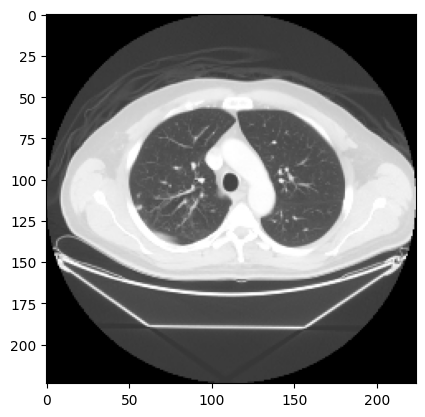

In [9]:
img = np.asarray(images_nodule[0])
imgplot = plt.imshow(img)


# Model definition

In [46]:
optimizer = Adam()


In [109]:
def initialize_model():

    model = models.Sequential()
    model.add(layers.Conv2D(128, (4,4), activation="relu", input_shape=(224, 224, 3)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(32, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(16, (2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))
    ### Model compilation
    model.compile(loss='sparse_categorical_crossentropy',
       optimizer='adam',
       metrics=['accuracy'])
    return model


# Creating X and y for training and testing

In [110]:
X = np.concatenate((images_airspace, images_bronch, images_inter, images_nodule, images_parenchyma, images_normal), axis=0)
y = np.concatenate((labels_airspace, labels_bronch, labels_inter, labels_nodule, labels_parenchyma, labels_normal), axis=0)


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [112]:
X_train.shape


(656, 224, 224, 3)

In [113]:
y_train.shape


(656,)

# Training the model

In [116]:
model = initialize_model()


In [117]:
es = EarlyStopping(patience = 5, restore_best_weights=True)

history = model.fit(X_train, y_train,
          epochs=100,
          batch_size=16,
          validation_split = 0.2,
          callbacks=[es],
          verbose=1)


Epoch 1/100
33/33 [==============================] - 55s 2s/step - loss: 6.3302 - accuracy: 0.3225 - val_loss: 1.4105 - val_accuracy: 0.4318
Epoch 2/100
33/33 [==============================] - 52s 2s/step - loss: 1.3048 - accuracy: 0.5000 - val_loss: 1.3119 - val_accuracy: 0.5000
Epoch 3/100
33/33 [==============================] - 54s 2s/step - loss: 1.1836 - accuracy: 0.5344 - val_loss: 1.2999 - val_accuracy: 0.5000
Epoch 4/100
33/33 [==============================] - 49s 1s/step - loss: 1.0536 - accuracy: 0.6031 - val_loss: 1.3032 - val_accuracy: 0.5758
Epoch 5/100
33/33 [==============================] - 51s 2s/step - loss: 0.9372 - accuracy: 0.6527 - val_loss: 1.2912 - val_accuracy: 0.5000
Epoch 6/100
33/33 [==============================] - 48s 1s/step - loss: 0.8770 - accuracy: 0.6870 - val_loss: 1.2842 - val_accuracy: 0.5530
Epoch 7/100
33/33 [==============================] - 48s 1s/step - loss: 0.6935 - accuracy: 0.7328 - val_loss: 1.1957 - val_accuracy: 0.5985
Epoch 8/100
3

# Testing the model and displaying results

In [118]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))

    # --- LOSS ---

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- ACCURACY

    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)


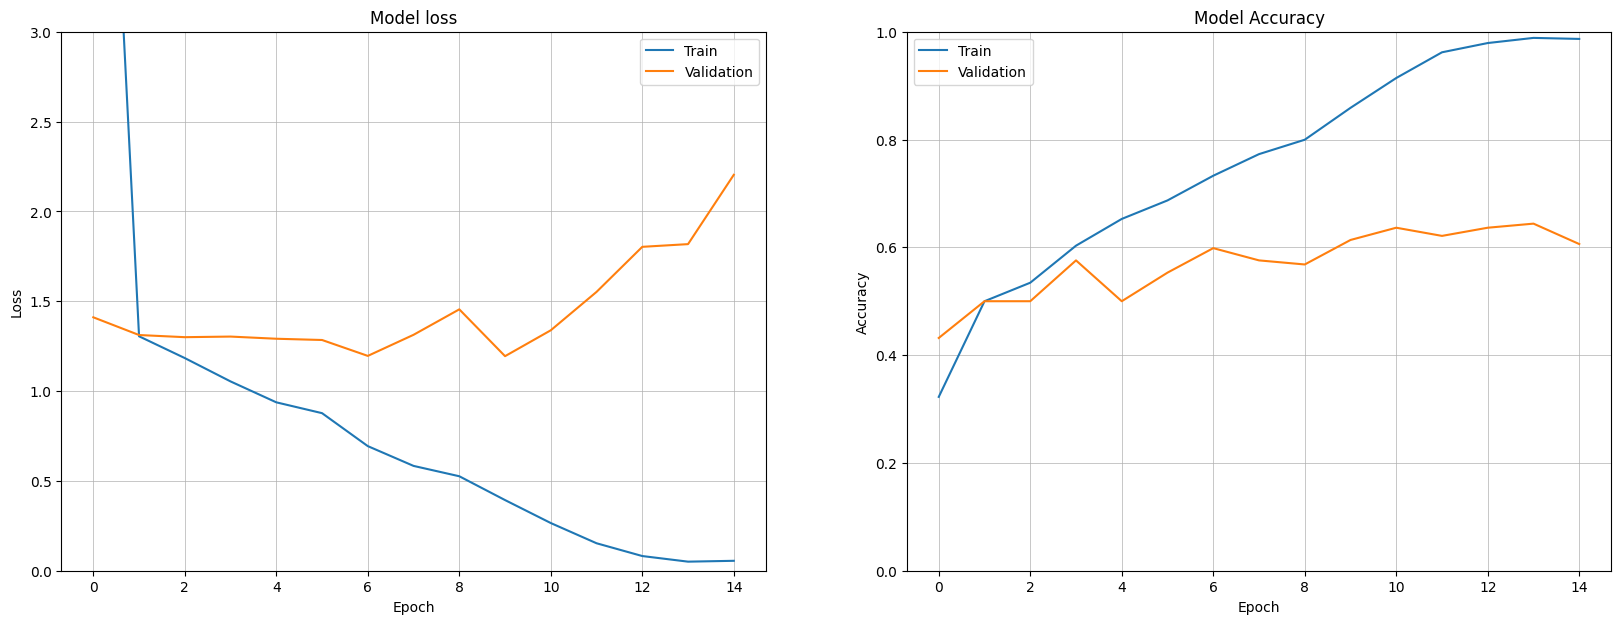

In [119]:
plot_loss_accuracy(history, title=None)


In [120]:
evaluation = model.evaluate(X_test, y_test)


6/6 [==============================] - 4s 597ms/step - loss: 1.6174 - accuracy: 0.4878


In [20]:
print(f'Model accuracy is {round(evaluation[1]*100,2)} %')


Model accuracy is 53.66 %
